In [2]:
## The reference of this notebook using a book Time Series Forecasting using Deep Learning by IAVN GRIDIN (bpb publications)

In [ ]:
import matplotlib.pyplot as plt
import random

## Random Walk Generation

In [3]:
def generate_random_walk(length = 100, mu = 0, sig = 1):
    ts = []
    for i in range(length):
        e = random.gauss(mu, sig)
        if i == 0:
            ts.append(e)
        else:
            ts.append(ts[i-1] + e)
    return ts




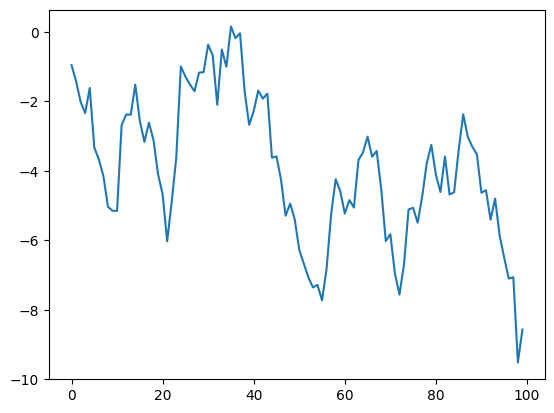

In [4]:
if __name__ == "__main__":
    random.seed(10)
    random_walk = generate_random_walk(100)
    plt.plot(random_walk)
    plt.show()

# Time series with linear trend => trend + noise using random gaussian value = linear trend

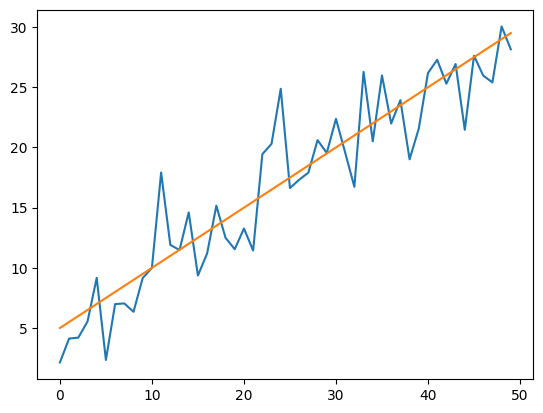

In [7]:
if __name__ == "__main__":
    random.seed(10)
    length = 50
    a = 5
    b = 0.5
    c = 3
    trend = [a + b * i for i in range(length)]
    noise = [c * random.gauss(0,1) for _ in range(length)]
    ts = [trend[i] + noise[i] for i in range(length)]
    plt.plot(ts)
    plt.plot(trend)
    plt.show()

## Time series with non linear trend

In [9]:
from math import log

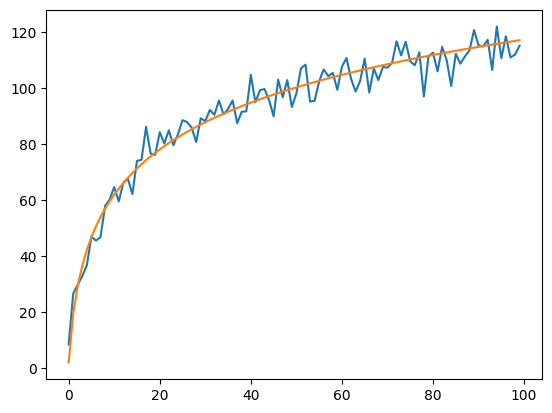

In [10]:
if __name__ == "__main__":
    random.seed(1)
    length = 100
    a = 2
    b = 25
    c = 5
    noise = [c * random.gauss(0,1) for _ in range(length)]
    trend = [a + b * log(i) for i in range(1,length + 1)]
    ts = [trend[i] + noise[i] for i in range(length)]
    plt.plot(ts)
    plt.plot(trend)
    plt.show()

## Time series with seasonality

In [12]:
from math import sin

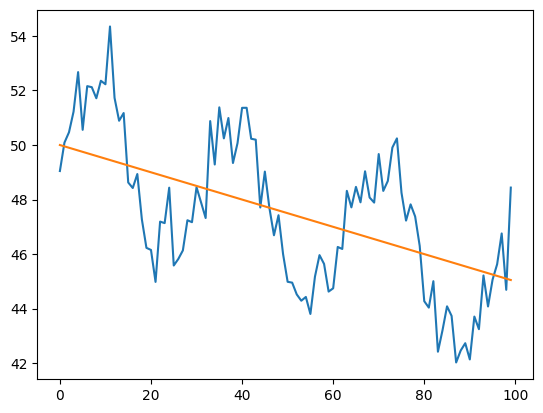

In [13]:
if __name__ == "__main__":
    random.seed(10)
    length = 100
    a = 50
    b = -.05
    c = 1
    s = 3
    trend = [a + b * i for i in range(length)]
    seasons = [s * sin(i/5) for i in range(length)]
    noise = [c * random.gauss(0,1) for _ in range(length)]
    ts = [trend[i] + noise[i] + seasons[i] for i in range(length)]
    plt.plot(ts)
    plt.plot(trend)
    plt.show()

## Autoregressive Model (AR)

In [14]:
from statsmodels.tsa.ar_model import AutoReg

In [17]:
%pip install yfinance

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/e6/b3/388ab967a387cc92926f70e97688dd9a7189b29a0773db815ffc5289e2b5/yfinance-0.2.31-py2.py3-none-any.whl.metadata
  Obtaining dependency information for lxml>=4.9.1 from https://files.pythonhosted.org/packages/7a/2f/61afbbb627e910d83613f198ceea270376f6708f52a95b534db10c67b4eb/lxml-4.9.3-cp38-cp38-win_amd64.whl.metadata
     ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
     - -------------------------------------- 0.1/2.9 MB 2.6 MB/s eta 0:00:02
     --- ------------------------------------ 0.2/2.9 MB 2.9 MB/s eta 0:00:01
     ----- ---------------------------------- 0.4/2.9 MB 2.9 MB/s eta 0:00:01
     ------- -------------------------------- 0.6/2.9 MB 3.3 MB/s eta 0:00:01
     ----------- ---------------------------- 0.8/2.9 MB 3.8 MB/s eta 0:00:01
     ------------ --------------------------- 0.9/2.9 MB 3.4 MB/s eta 0:00:01
     ---------------- ----------------------- 1.


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import yfinance as yf

In [23]:
quotes = yf.download('FB',start = '2011-1-1', end = '2021-1-1')
model = AutoReg(quotes['Close'], lags = 2)
model_fit = model.fit()
print(model_fit.params)

[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FB']: Exception('%ticker%: No timezone found, symbol may be delisted')


C:\Users\sures\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ValueError: maxlag should be < nobs

In [ ]:
ARIMA, SARAMA, HWES

In [25]:
import torch
print(torch.cuda.is_available())

False


In [26]:
%pip install torch torchvision torchaudio

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
%pip install torchviz graphviz

Note: you may need to restart the kernel to use updated packages.Collecting torchviz
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/47.0 kB ? eta -:--:--
     --------------------------------- ---- 41.0/47.0 kB 991.0 kB/s eta 0:00:01
     -------------------------------------- 47.0/47.0 kB 782.9 kB/s eta 0:00:00
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4157 sha256=d9fafdd9be1117213fd05e1d7dbb075582ffb38fa5db2874b9c935eae18c970f
  Stored in directory: c:\users\sures\appdata\local\pip\cache\wheels\05\7d\1b\8306781244e42ede119edbb053bdcda1c1f424ca226165a417
Successfully built torchviz




[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import torch
def get_function (x1_val = 0, x2_val = 0, x3_val = 0, x4_val = 0):
    #variables
    x1 = torch.tensor(x1_val, requires_grad = True, dtype = torch.float32)
    x2 = torch.tensor(x2_val, requires_grad = True, dtype = torch.float32)
    x3 = torch.tensor(x3_val, requires_grad = True, dtype = torch.float32)
    x4 = torch.tensor(x4_val, requires_grad = True, dtype = torch.float32)
    #function
    p1 = x1.pow(3)
    m1 = p1 * x2
    m2 = x3 * x4
    f = m1 + m2
    vars = {'x1': x1, 'x2': x2, 'x3': x3, 'x4': x4}
    return f, vars

In [29]:
if __name__ == '__main__':
    f, _ = get_function(2,4,3,5)
    print(f.item())

47.0


In [33]:
from torchviz import make_dot
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [35]:
if __name__ == '__main__':
    f, params = get_function(2,4,3,5)
    make_dot(f, params).render("f_torchviz")
    img = mpimg.imread('f_torchviz.png')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)
    plt.show()
    

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [36]:
from torch.autograd import grad
f, params = get_function(2,4,3,5)
df_dx1 = grad(outputs = f, inputs = [params['x1']])
print(df_dx1)

(tensor(48.),)


In [37]:
from torch.autograd import grad
f, params = get_function(2,4,3,5)
df_dx1 = grad(outputs = f, inputs = params.values())
print(df_dx1)

(tensor(48.), tensor(8.), tensor(5.), tensor(3.))


In [38]:
import torch
x=torch.tensor(data=[1,2,3])
print(x)

tensor([1, 2, 3])


In [39]:
x=torch.tensor(data=[[1,2,3],[4,5,6]])
print(x)

tensor([[1, 2, 3],
        [4, 5, 6]])


In [40]:
x=torch.tensor(data=[1.3,.5], dtype = torch.float32) #you must explicitly set the tensor type to make some math operatons available with the tensor you create
print(x)

tensor([1.3000, 0.5000])


In [41]:
x=torch.tensor(data=[1.3,.5], dtype = torch.float32, requires_grad=True)    #if you want to take the derivatives of the tensor use requires_grad=True
print(x)

tensor([1.3000, 0.5000], requires_grad=True)


## Random Tensor

In [42]:
import torch
x = torch.rand((2,2,2))
print(x)

tensor([[[0.4418, 0.3987],
         [0.4776, 0.6858]],

        [[0.1608, 0.9959],
         [0.1412, 0.0272]]])


In [43]:
torch.manual_seed(0)

random.seed(0)

In [44]:
x = torch.zeros((2,2)) ## same with ones will work
print(x)

tensor([[0., 0.],
        [0., 0.]])


In [45]:
x = torch.eye((3)) ## Identity tensor
print(x)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])


In [46]:
x = torch.tensor([1,2,3,4]) ## same with ones will work
print(x)

tensor([1, 2, 3, 4])


In [47]:
y = x.reshape((2,2))
print(y)

tensor([[1, 2],
        [3, 4]])


In [48]:
x = torch.tensor([[1,2,3],[4,5,6]])
print(x)

tensor([[1, 2, 3],
        [4, 5, 6]])


In [49]:
x.size()

torch.Size([2, 3])

In [50]:
x.dim()

2

In [51]:
x.tolist()

[[1, 2, 3], [4, 5, 6]]

In [61]:
x = torch.tensor(data = [4], dtype = torch.float32, requires_grad = True)
f = x.pow(3)
f.backward()
x.grad.item()

48.0

In [64]:
a = torch.randn(4)
print(a)
exp = torch.arange(1., 5.)
b = torch.pow(a, exp)
print(b)

tensor([-0.7193, -0.4033, -0.5966,  0.1820])
tensor([-0.7193,  0.1627, -0.2124,  0.0011])


## deep learning layers 

## Linear Layer

In [67]:
import torch
torch.manual_seed(1)
ll = torch.nn.Linear(2,3)
print(ll.weight)

Parameter containing:
tensor([[ 0.3643, -0.3121],
        [-0.1371,  0.3319],
        [-0.6657,  0.4241]], requires_grad=True)


In [70]:
x= torch.tensor(data = [1,2,3]).float()
ll = torch.nn.Linear(3,2)
ll.weight = torch.nn.Parameter(torch.tensor([[0,2,5],[1,0,2]]).float())
ll.bias = torch.nn.Parameter(torch.tensor([1,1]).float())
print(f'x: {x.tolist()}')
print(f'A: {ll.weight.tolist()}')
print(f'b: {ll.bias.tolist()}')
print(f'y = Ax + b: {ll(x).tolist()}')

x: [1.0, 2.0, 3.0]
A: [[0.0, 2.0, 5.0], [1.0, 0.0, 2.0]]
b: [1.0, 1.0]
y = Ax + b: [20.0, 8.0]


## convolution 1d & 2d layers

In [72]:
import torch
from torch.nn.parameter import Parameter
A = torch.tensor([[[[1,2,0,1],
                     [-1,0,3,2],
                     [1,3,0,1],
                     [2,-2,1,0]]]]).float()
conv2d = torch.nn.Conv2d(1,1,kernel_size = 2, bias = False)
conv2d.weight = Parameter(torch.tensor([[[[1,-1],[-1,1]]]]).float())
output = conv2d(A)
print(output)

tensor([[[[ 0.,  5., -2.],
          [ 1., -6.,  2.],
          [-6.,  6., -2.]]]], grad_fn=<ConvolutionBackward0>)


In [75]:
import torch
from torch.nn.parameter import Parameter
A = torch.tensor([[[1,0,2,0,3,0]]]).float()
conv1d = torch.nn.Conv1d(1,out_channels = 2, kernel_size = 3, bias = False)
conv1d.weight = Parameter(torch.tensor([[[1,0,-1]],[[0,2,0]]]).float())
output = conv1d(A)
print(output)

tensor([[[-1.,  0., -1.,  0.],
         [ 0.,  4.,  0.,  6.]]], grad_fn=<ConvolutionBackward0>)
